### Multiple Factor Analysis (MFA) using Prince
This example is taken from the [Prince website](https://github.com/MaxHalford/Prince).

Multiple factor analysis (MFA) is meant to be used when you have groups of variables. In practice it builds a PCA on each group -- or an MCA, depending on the types of the group's variables. It then constructs a global PCA on the results of the so-called partial PCAs -- or MCAs.

The example in this notebook uses the wine data from [a paper called
"Multiple Factor Analysis (MFA)"](https://www.utdallas.edu/~herve/Abdi-MFA2007-pretty.pdf), by Abdi and Valentin. Three experts gave their opinion on six different wines. Each opinion for each wine is recorded as a variable. We thus want to consider the separate opinions of each expert whilst also having a global overview of each wine. MFA is the perfect fit for this kind of situation.

In [61]:
import pandas as pd
import numpy as np
from prince import MFA
import matplotlib.pyplot as plt

In [14]:
X = pd.DataFrame(
    data=[
        [1, 1, 6, 7, 2, 5, 7, 6, 3, 6, 7],
        [2, 5, 3, 2, 4, 4, 4, 2, 4, 4, 3],
        [2, 6, 1, 1, 5, 2, 1, 1, 7, 1, 1],
        [2, 7, 1, 2, 7, 2, 1, 2, 2, 2, 2],
        [1, 2, 5, 4, 3, 5, 6, 5, 2, 6, 6],
        [1, 3, 4, 4, 3, 5, 4, 5, 1, 7, 5]
    ],
    columns=[
        'Oak type',
        'E1 fruity', 'E1 woody', 'E1 coffee',
        'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
        'E3 fruity', 'E3 butter', 'E3 woody'
    ],
    index=['Wine {}'.format(i+1) for i in range(6)]
)
X

,Oak type,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody
Wine 1,1,1,6,7,2,5,7,6,3,6,7
Wine 2,2,5,3,2,4,4,4,2,4,4,3
Wine 3,2,6,1,1,5,2,1,1,7,1,1
Wine 4,2,7,1,2,7,2,1,2,2,2,2
Wine 5,1,2,5,4,3,5,6,5,2,6,6
Wine 6,1,3,4,4,3,5,4,5,1,7,5


In [15]:
# The groups are passed as a dictionary to the MFA class.
groups = {
    'Expert #{}'.format(no+1): [c for c in X.columns if c.startswith('E{}'.format(no+1))]
    for no in range(3)
}
groups

{'Expert #1': ['E1 fruity', 'E1 woody', 'E1 coffee'],
 'Expert #2': ['E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody'],
 'Expert #3': ['E3 fruity', 'E3 butter', 'E3 woody']}

In [98]:
mfa = MFA(
    groups=groups,
    n_components=5,
    n_iter=3,
    copy=True,
    engine='auto',
    random_state=None
)
mfa = mfa.fit(X)

In [99]:
# The MFA inherits from the PCA class, so you have access to all its
# methods and properties. The row_coordinates method will return
# the global coordinates of each wine.
mfa.row_coordinates(X)

,0,1,2,3,4
Wine 1,-2.172155,-0.508596,0.484354,0.018239,-0.084861
Wine 2,0.557017,-0.197408,-0.410158,-0.229566,-0.148630
Wine 3,2.317663,-0.830259,-0.006244,0.161558,0.070279
Wine 4,1.832557,0.905046,0.398983,-0.066952,-0.008318
Wine 5,-1.403787,0.054977,-0.130753,-0.175396,0.202326
Wine 6,-1.131296,0.576241,-0.336181,0.292118,-0.030797


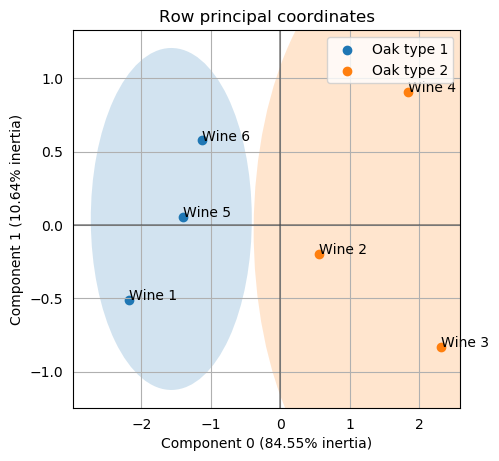

In [100]:
ax = mfa.plot_row_coordinates(
    X,
    ax=None,
    x_component=0,
    y_component=1,
    labels=X.index,
    color_labels=['Oak type {}'.format(t) for t in X['Oak type']],
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)
fig = ax.get_figure()
fig.set_figheight(5)
fig.set_figwidth(5)
fig.set_dpi(100)
plt.show()

In [101]:
mfa.partial_row_coordinates(X)

Expert #1                                         Expert #2            \
               0         1         2         3         4         0         1   
Wine 1 -2.764432 -1.104812  2.291269  0.395262 -0.666474 -2.213928 -0.863519   
Wine 2  0.773034  0.298919 -0.811856 -0.314588  0.271716  0.284247 -0.132135   
Wine 3  1.991398  0.805893 -1.479412 -0.080673  0.394757  2.111508  0.499718   
Wine 4  1.981456  0.927187 -0.923993  0.023167 -0.590157  2.393009  1.227146   
Wine 5 -1.292834 -0.620661  0.490031 -0.096023  0.510547 -1.492114 -0.488088   
Wine 6 -0.688623 -0.306527  0.433962  0.072855  0.079610 -1.082723 -0.243122   

                                     Expert #3                                \
               2         3         4         0         1         2         3   
Wine 1 -0.743153 -0.269623 -0.060609 -1.538106  0.442545 -0.095053 -0.070922   
Wine 2 -0.353408 -0.548458 -0.523057  0.613771 -0.759009 -0.065210  0.174349   
Wine 3  0.774145  0.494275  0.007899  2.850084 -3.796390  0.686535  0.071072   
Wine 4  1.567357  0.200601  0.675549  1.123206  0.560803  0.553584 -0.424625   
Wine 5 -0.619388 -0.402667 -0.125057 -1.426414  1.273679 -0.262902 -0.027499   
Wine 6 -0.625551  0.525872  0.025276 -1.622541  2.278372 -0.816955  0.277626   

                  
               4  
Wine 1  0.472500  
Wine 2 -0.194548  
Wine 3 -0.191819  
Wine 4 -0.110345  
Wine 5  0.221489  
Wine 6 -0.197277

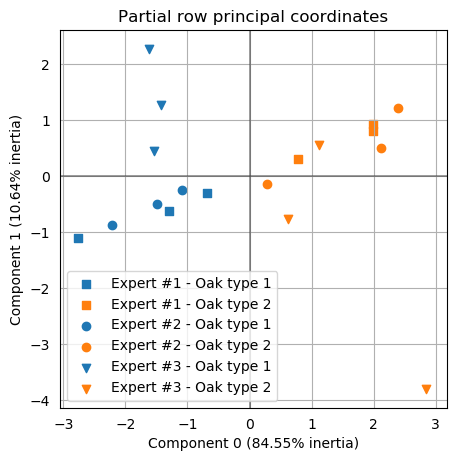

In [102]:
ax = mfa.plot_partial_row_coordinates(
    X,
    x_component=0,
    y_component=1,
    color_labels=['Oak type {}'.format(t) for t in X['Oak type']]
)
fig = ax.get_figure()
fig.set_figheight(5)
fig.set_figwidth(5)
fig.set_dpi(100)
plt.show()

In [103]:
# Partial inertias, as in Table 3 of the paper.
for e in mfa.groups.keys():
    print('Partial intertias for {}:'.format(e))
    print(
        ['{:.3f}'.format(x) for x in mfa.partial_factor_analysis_[e].explained_inertia_]
    )

Partial intertias for Expert #1:
['0.954', '0.040', '0.006']
Partial intertias for Expert #2:
['0.913', '0.049', '0.021', '0.017']
Partial intertias for Expert #3:
['0.827', '0.147', '0.026']


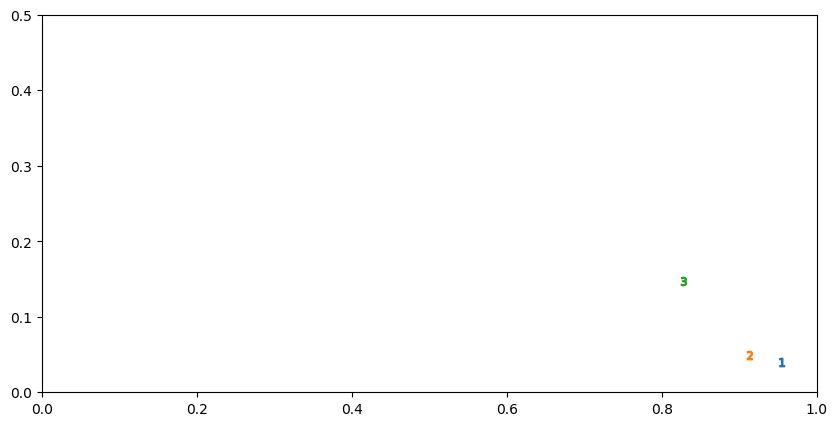

In [104]:
# Partial inertia: plot of the experts on the first two components
fig = plt.figure(figsize=(10,5), dpi=100)
plt.plot(0.954, 0.040, marker='$1$')
plt.plot(0.913, 0.049, marker='$2$')
plt.plot(0.827, 0.147, marker='$3$')
plt.xlim(0,1)
plt.ylim(0,0.5)
plt.show()

In [105]:
mfa.eigenvalues_

[2.8348006720963843,
 0.35685904912090755,
 0.11536147333118846,
 0.033285551366019864,
 0.012697464030381734]

In [69]:
np.sum(np.power(mfa.V_[0,0:3], 2)) * lambda1

0.9597660356536484

In [52]:
lambda1 * mfa.partial_row_coordinates(X)['Expert #1'][0]

Wine 1   -7.836613
Wine 2    2.191397
Wine 3    5.645216
Wine 4    5.617033
Wine 5   -3.664926
Wine 6   -1.952108
Name: 0, dtype: float64